<a href="https://colab.research.google.com/github/chychur/ds-10/blob/main/ds_10_part_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional neural networks using VGG16


In this part #2, we will again work with the [fasion_mnist dataset](https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=ru "fasion_mnist dataset").

Let's create a convolutional neural network that uses [VGG16](https://commons.wikimedia.org/wiki/File:VGG16.png "VGG16") as a convolutional basis, unlike the previous task.



We will train the resulting network on data from the fasion_mnist dataset and try to achieve the maximum possible classification accuracy by manipulating the network parameters. During the training, we will use additional training techniques and feature selection.

We compare the accuracy of the obtained convolutional network with the accuracy of the multilayer network from the previous task.

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
#test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)

X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
X_train_rgb = [img_to_array(array_to_img(img).convert("RGB")) for img in X_train]
X_test_rgb = [img_to_array(array_to_img(img).convert("RGB")) for img in X_test]

X_train_rgb = np.array(X_train_rgb)
X_test_rgb = np.array(X_test_rgb)


# Resize the images 32*32 as required by VGG16
X_train_resized = tf.image.resize(X_train_rgb, size=(48, 48)).numpy()
X_test_resized = tf.image.resize(X_test_rgb, size=(48, 48)).numpy()

# Loading convolutional basis VGG16 without fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# Convolutional neural network based on VGG16
train_features = base_model.predict(X_train_resized)
test_features = base_model.predict(X_test_resized)
model = models.Sequential()
model.add(layers.Flatten(input_shape=train_features.shape[1:]))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

313/313 [==============================] - 260s 830ms/step


In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 133898 (523.04 KB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(train_features, y_train, epochs=50, batch_size=1280, validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 3s 53ms/step - loss: 0.4719 - accuracy: 0.8330 - val_loss: 0.4528 - val_accuracy: 0.8443
Epoch 2/50
38/38 [==============================] - 1s 27ms/step - loss: 0.4654 - accuracy: 0.8360 - val_loss: 0.4511 - val_accuracy: 0.8455
Epoch 3/50
38/38 [==============================] - 1s 26ms/step - loss: 0.4622 - accuracy: 0.8350 - val_loss: 0.4500 - val_accuracy: 0.8462
Epoch 4/50
38/38 [==============================] - 1s 27ms/step - loss: 0.4617 - accuracy: 0.8344 - val_loss: 0.4496 - val_accuracy: 0.8465
Epoch 5/50
38/38 [==============================] - 1s 25ms/step - loss: 0.4594 - accuracy: 0.8365 - val_loss: 0.4483 - val_accuracy: 0.8473
Epoch 6/50
38/38 [==============================] - 1s 27ms/step - loss: 0.4565 - accuracy: 0.8375 - val_loss: 0.4473 - val_accuracy: 0.8478
Epoch 7/50
38/38 [==============================] - 1s 27ms/step - loss: 0.4534 - accuracy: 0.8395 - val_loss: 0.4462 - val_accuracy: 0.8483
Epoch 8/50
38

In [12]:
# Predictions
test_features = base_model.predict(X_test_resized)
predictions = model.predict(test_features)
predicted_classes = np.argmax(predictions, axis=1)

# Classification Report

print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.97      0.95      0.96      1000
           2       0.79      0.76      0.78      1000
           3       0.81      0.81      0.81      1000
           4       0.72      0.77      0.74      1000
           5       0.94      0.94      0.94      1000
           6       0.64      0.59      0.62      1000
           7       0.90      0.93      0.92      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



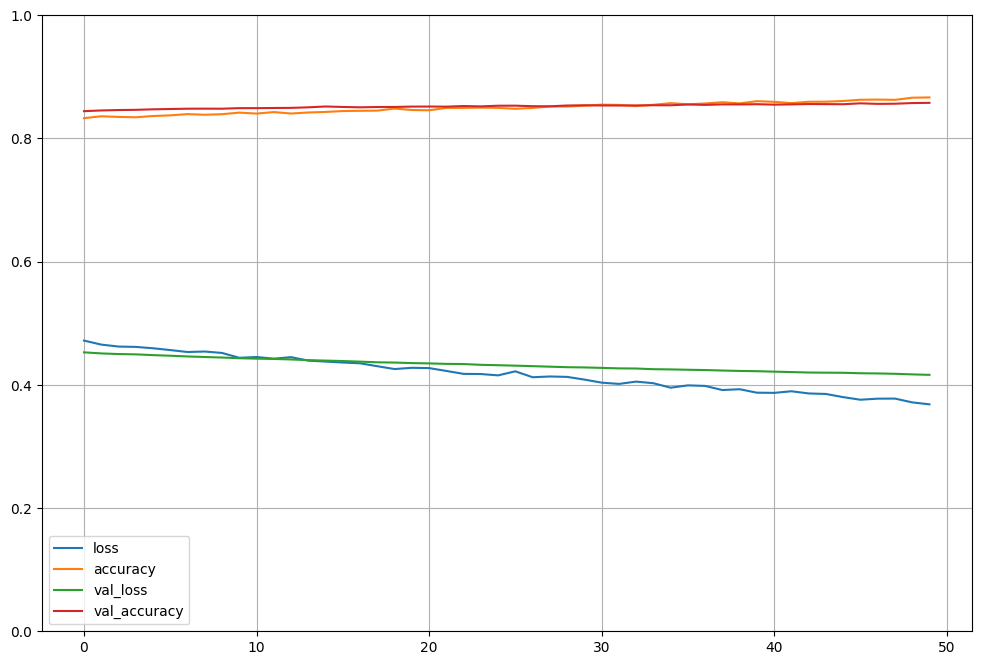

In [13]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 1s 3ms/step


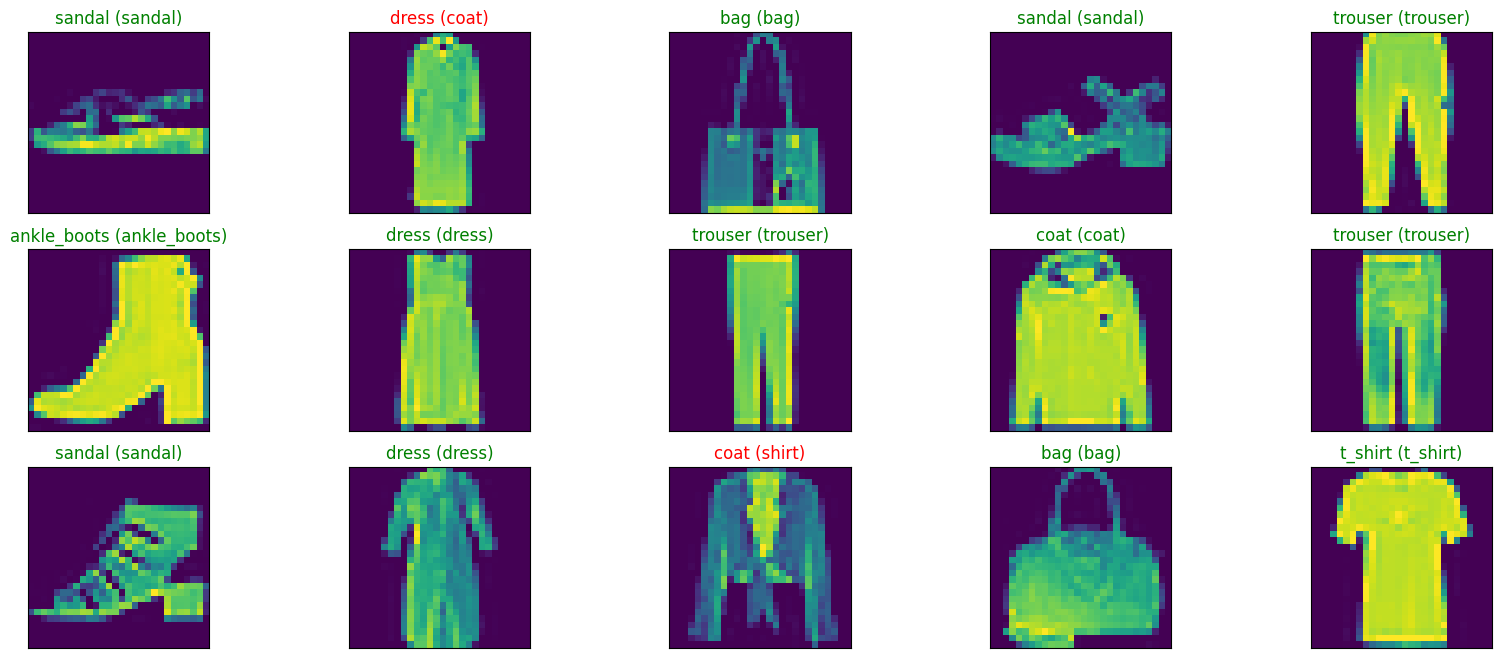

In [36]:
fashion_mnist_labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
y_hat = model.predict(test_features)
X_test = X_test.reshape(10000, 28, 28)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test, axis=1)[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Conclusions:

Both models achieved high accuracy, but the multilayer network achieved better results. A convolutional network has fewer parameters because it uses the advantages of mapping and spatial understanding of objects. A multi-layer network is likely to be more prone to overtraining due to the much larger number of parameters. A convolutional network is more likely to detect local features in images, while a multilayer network can make more global assessments.